原文代码作者：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

# 第2章 感知机


### Prerequisite knowledge
拉格朗日乘子法，求函数f(x1,x2,...)在约束条件g(x1,x2,...)=0下的极值的方法。
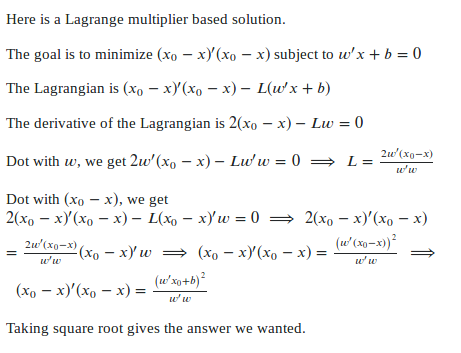

prediction: $f(x) = sign(w*x + b)$

误分类点$x_{i}$到hyperplane的距离为 $$-\frac{1}{||w||}y_{i}(w*x_{i} + b)$$

损失函数选择误分类点到超平面的总距离(二分类)为,不考虑$||w||$

$$L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$$  

$$w' = w + \eta y_{i}x_{i}$$

$$b' = b + \eta y_{i}$$

二分类，y={-1,1}
当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该无分类点的一侧移动，直至无分类点被正确分类

IRIS 是常用的分类实验数据集
数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [17]:
#
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

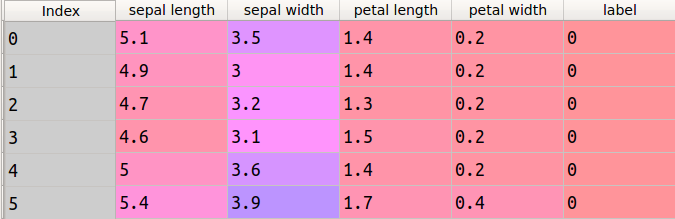

以iris数据集中[sepal length，sepal width]作为特征

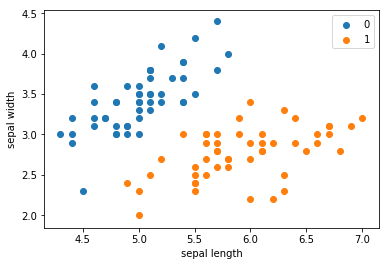

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## Perceptron

In [26]:
# 数据线性可分，二分类数据
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        self.count = 0
        # self.data = data
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = True
        while is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:#虽然公式的delta_w/b是累加，但是batch更新比较快
                    self.w = self.w + self.l_rate*np.dot(y, X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = False
            else:
                self.count+=1

In [27]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [43]:
perceptron = Model()
perceptron.fit(X, y)
print(perceptron.count)

2920


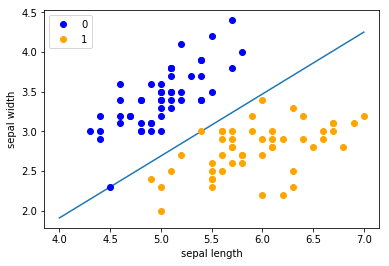

In [10]:
x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn Perceptron

In [20]:
from sklearn.linear_model import Perceptron

In [24]:
clf = Perceptron( max_iter=1000, shuffle=False)
clf.fit(X, y)

/home/ga/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=False, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

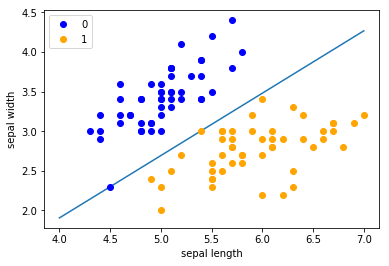

In [25]:
x_points = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()